In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1

In [23]:
n=(np.arange(0,50,2))
x=n**2-1
s1 = pd.Series(x, index=[n], name="q1")

s1[n % 3== 0]=0
print(s1)

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
Name: q1, dtype: int32


In [25]:
s4 = pd.Series([1, 2, 4], index=['a', 'c', 'd'])
s5 = pd.Series([10, 20, 40], index=['a', 'b', 'd'])
2*s4 + s5

a    12.0
b     NaN
c     NaN
d    48.0
dtype: float64

# Q2

In [105]:
def rw(p, m):
    val=np.empty([366])
    val[0]=m
    s= np.random.binomial(size=366, n=1, p= 0.5)
    for d in range(0,365):
        val[d+1] =val[d]+s[d]*2-1
    return val

In [119]:
dates=pd.date_range("1/1/2000", "12/31/2000", freq='D')

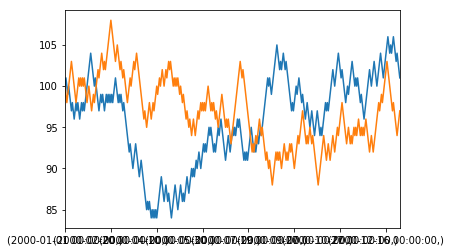

In [120]:
s5 = pd.Series(rw(0.9, 100), index=[dates])
s5.plot()
s5 = pd.Series(rw(0.2, 100), index=[dates])
s5.plot()

In [128]:
x = pd.Series(np.random.randn(4), ['a', 'b', 'c', 'd'])
y = pd.Series(np.random.randn(5), ['a', 'b', 'd', 'e', 'f'])
df1 = pd.DataFrame({"series 1": x, "series 2": y})

In [129]:
df1["series 1"].dropna()

a   -1.007657
b   -1.496556
c    2.289047
d   -0.445272
Name: series 1, dtype: float64

In [140]:
data = np.random.random((3, 4))
pd.DataFrame(data, index=['A', 'B', 'C'], columns=np.arange(1, 5))


TypeError: '(slice(None, None, None), 2)' is an invalid key

In [147]:
df = pd.DataFrame(np.random.randn(4, 2), index=['a', 'b', 'c', 'd'], columns = ['I', 'II'])
df[:2]

,I,II
a,-0.253322,-0.798725
b,-0.199075,0.689474


### Data access

In [148]:
# select rows a and c, column II
df.loc[['a','c'], 'II']
# select last two rows, first column
df.iloc[-2:, 0]


a   -0.798725
b    0.689474
c   -0.884407
d    0.262011
Name: II, dtype: float64

In [150]:
df['II'] #
df['II'] = 0
df

,I,II
a,-0.253322,0
b,-0.199075,0
c,-0.492949,0
d,-1.069943,0


In [152]:
df['III'] = 1
df

,I,II,III
a,-0.253322,0,1
b,-0.199075,0,1
c,-0.492949,0,1
d,-1.069943,0,1


# Q3

In [170]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', ' Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major })

In [182]:
studentInfo[(studentInfo['Age']> 19) &  (studentInfo['Sex'] == 'M')][['ID', 'Name'  ]]

,ID,Name
0,0,Mylan
6,6,Matt


In [183]:
pd.merge(studentInfo, mathInfo, on='ID')

,ID,Name,Sex,Age,Class,Grade,Math_Major
0,0,Mylan,M,20,Sp,4.0,y
1,1,Regan,F,21,Se,3.0,n
2,3,Jess,F,22,Se,4.0,n
3,5,Remi,F,20,J,3.5,y
4,6,Matt,M,20,J,3.0,n


# Q4

Using a join operation, create a DataFrame containing the ID, age, and GPA of
all male individuals. You ought to be able to accomplish this in one line of code

In [195]:
newdata=pd.merge(studentInfo[['Age','ID']], otherInfo[['GPA','ID']], on='ID')
newdata

,Age,ID,GPA
0,20,0,3.8
1,21,1,3.5
2,18,2,3.0
3,22,3,3.9
4,19,4,2.8
5,20,5,2.9
6,20,6,3.8
7,19,7,3.4
8,20,8,3.7
